<a href="https://colab.research.google.com/github/ggurusaran/Dogs-vs-cats/blob/main/Dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam


In [ ]:
test_path = '/content/drive/MyDrive/dogvscat/test'
train_path = '/content/drive/MyDrive/dogvscat/train'

In [ ]:
train_datagen = ImageDataGenerator( rescale= 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory( directory=  train_path,
                                    target_size = (100, 100),
                                    batch_size = 32,
                                  class_mode = 'binary')

Found 504 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory( directory=  test_path,
                                    target_size = (100, 100),
                                    batch_size = 32,
                                  class_mode = 'binary')

Found 50 images belonging to 2 classes.


In [ ]:
imgs, labels = next(training_set)


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 3, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

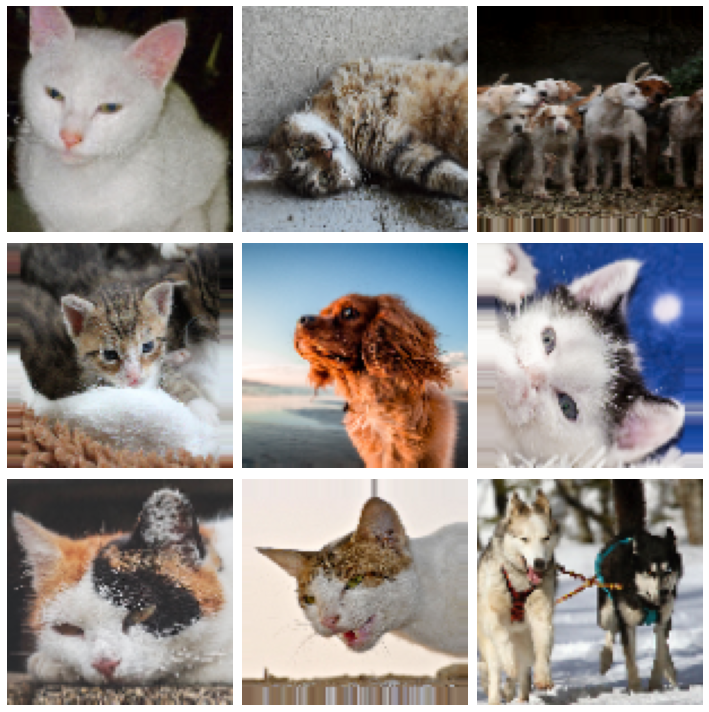

[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0.]


In [ ]:
plotImages(imgs)
print(labels)

###Using a Simple CNN model:



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3])),
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
16/16 [==============================] - 130s 8s/step - loss: 0.7864 - accuracy: 0.5298 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/25
16/16 [==============================] - 15s 956ms/step - loss: 0.6915 - accuracy: 0.5179 - val_loss: 0.6861 - val_accuracy: 0.5600
Epoch 3/25
16/16 [==============================] - 15s 964ms/step - loss: 0.6809 - accuracy: 0.5774 - val_loss: 0.6649 - val_accuracy: 0.5600
Epoch 4/25
16/16 [==============================] - 16s 1s/step - loss: 0.6627 - accuracy: 0.6091 - val_loss: 0.6898 - val_accuracy: 0.5200
Epoch 5/25
16/16 [==============================] - 17s 1s/step - loss: 0.6254 - accuracy: 0.6488 - val_loss: 0.7458 - val_accuracy: 0.6000
Epoch 6/25
16/16 [==============================] - 16s 978ms/step - loss: 0.6360 - accuracy: 0.6310 - val_loss: 0.7018 - val_accuracy: 0.5600
Epoch 7/25
16/16 [==============================] - 15s 951ms/step - loss: 0.5954 - accuracy: 0.6627 - val_loss: 0.8189 - val_accuracy: 0.5400
Epoch 8

In [ ]:
score = model.evaluate( test_set, verbose=0)
print("Model accuracy :" ,score[1])

Model accuracy : 0.5799999833106995


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
import numpy as np
y_pred = model.predict(test_set)
y_pred = y_pred>0.5
y_pred = np.round(y_pred)

2/2 [==============================] - 1s 433ms/step


In [ ]:
cm = confusion_matrix( test_set.classes, y_pred)
print(cm)
print(accuracy_score(test_set.classes, y_pred))

[[19  6]
 [19  6]]
0.5


###Transfer learning using VGG16 Model

In [ ]:

from tensorflow.keras.applications import VGG16

new_model=VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
new_model.trainable = False

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(new_model)
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units = 128, activation ='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,304,769
Trainable params: 590,081
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics =['accuracy'])

###Training the VGG16 Model

In [ ]:
model.fit(x =training_set, validation_data= test_set,  epochs=10)

Epoch 1/10
16/16 [==============================] - 18s 1s/step - loss: 0.8398 - accuracy: 0.5913 - val_loss: 0.4443 - val_accuracy: 0.7800
Epoch 2/10
16/16 [==============================] - 15s 953ms/step - loss: 0.3828 - accuracy: 0.8373 - val_loss: 0.3499 - val_accuracy: 0.8600
Epoch 3/10
16/16 [==============================] - 15s 947ms/step - loss: 0.3172 - accuracy: 0.8631 - val_loss: 0.3450 - val_accuracy: 0.8600
Epoch 4/10
16/16 [==============================] - 15s 948ms/step - loss: 0.2612 - accuracy: 0.9008 - val_loss: 0.3816 - val_accuracy: 0.8600
Epoch 5/10
16/16 [==============================] - 15s 939ms/step - loss: 0.2540 - accuracy: 0.9028 - val_loss: 0.3919 - val_accuracy: 0.8400
Epoch 6/10
16/16 [==============================] - 15s 957ms/step - loss: 0.2129 - accuracy: 0.9127 - val_loss: 0.3870 - val_accuracy: 0.8800
Epoch 7/10
16/16 [==============================] - 17s 1s/step - loss: 0.1756 - accuracy: 0.9286 - val_loss: 0.4361 - val_accuracy: 0.8000
Epoch

In [ ]:
score = model.evaluate( test_set, verbose=0)
print("Model accuracy :" ,score[1])

Model accuracy : 0.8399999737739563


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred = model.predict( test_set)
y_pred = y_pred > 0.5


2/2 [==============================] - 1s 465ms/step


In [ ]:
import numpy as np
y_pred = np.round(y_pred)

In [ ]:
cm = confusion_matrix( test_set.classes, y_pred)
print(cm)
print(accuracy_score(test_set.classes, y_pred))

[[16  9]
 [11 14]]
0.6


###Single prediction using the trained model

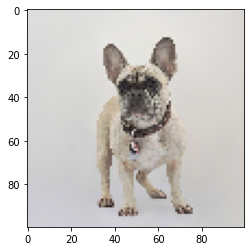

1/1 [==============================] - 0s 29ms/step
 dog


In [ ]:
import numpy as np
from keras.preprocessing import image
img_path = '/content/drive/MyDrive/dogvscat/test/1/262.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(100,100))
plt.imshow(img)
plt.show()

test_image = tf.keras.utils.load_img(img_path, target_size = (100,100))
#convert image format into array

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = ' dog'
else:
  prediction = 'cat'

print(prediction)